## How well do jobs and skills pay for Data Analysts?

Steps:

* Evaluate median salary for top 6 data jobs
* Find median salary per skill for Data Analysts
* Visualize for highest paying skills and most demanded skills

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 
import seaborn as sns 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x:ast.literal_eval(x) if pd.notna(x) else x)

### Salary Distribution by Job Title

In [2]:
df_IN = df[(df['job_country']=='India')].dropna(subset='salary_year_avg')

In [45]:
job_titles = df_IN['job_title_short'].value_counts().index[:5].tolist()

job_titles

['Data Engineer',
 'Data Analyst',
 'Data Scientist',
 'Machine Learning Engineer',
 'Senior Data Engineer']

In [46]:
df_IN_top5 = df_IN[df_IN['job_title_short'].isin(job_titles)]

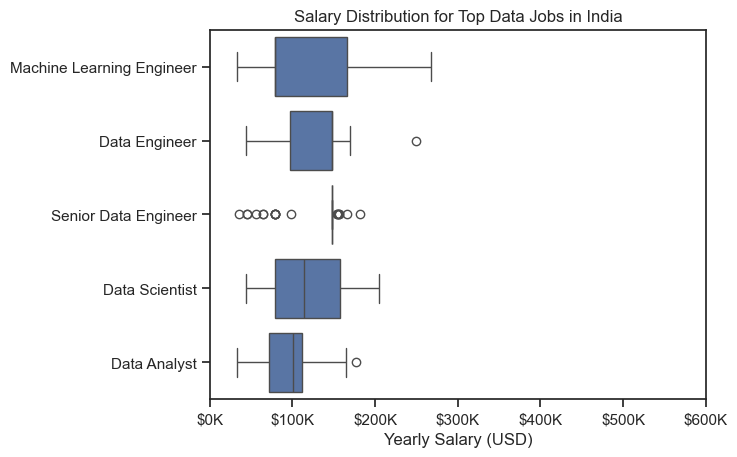

In [48]:
sns.boxplot(data=df_IN_top5, x='salary_year_avg',y='job_title_short')
sns.set_theme(style='ticks')


plt.title('Salary Distribution for Top Data Jobs in India')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0,600000)

ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

## Investigate Median Salary Vs Skill for Data Analysts

In [51]:
df_DA_IN = df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='India')].copy()

df_DA_IN = df_DA_IN.dropna(subset=['salary_year_avg'])

In [53]:
df_DA_IN = df_DA_IN.explode('job_skills')

df_DA_IN[['salary_year_avg','job_skills']].head(5)

,salary_year_avg,job_skills
11412,50400.0,python
11412,50400.0,sql
11412,50400.0,aws
11412,50400.0,azure
11412,50400.0,excel


In [60]:
df_DA_top_pay = df_DA_IN.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='median',ascending=False)

df_DA_top_pay = df_DA_top_pay.head(10)

df_DA_top_pay

,count,median
job_skills,,
postgresql,1,165000.0
pyspark,1,165000.0
gitlab,1,165000.0
linux,1,165000.0
mysql,1,165000.0
gdpr,2,163782.0
mongodb,6,163782.0
scala,3,163782.0
neo4j,1,163782.0


In [72]:
df_DA_skills = df_DA_IN.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False)

df_DA_skills = df_DA_skills.head(10).sort_values(by='median',ascending=False)

df_DA_skills

,count,median
job_skills,,
power bi,17,111175.0
spark,11,111175.0
tableau,20,108087.5
excel,39,98500.0
sql,46,96050.0
python,36,96050.0
azure,15,93600.0
r,18,79200.0
aws,12,79200.0


### Plot

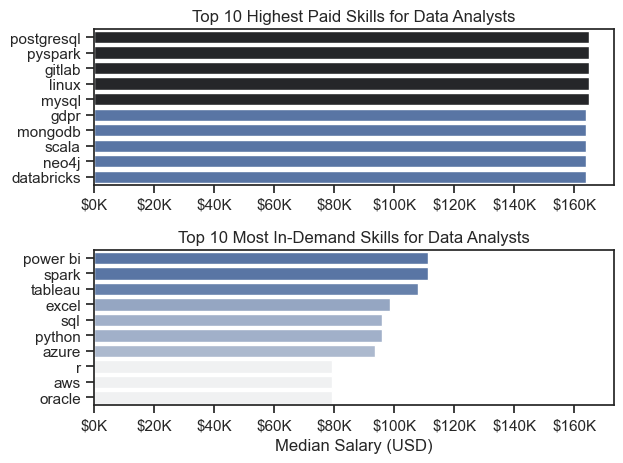

In [73]:
fig, ax = plt.subplots(2, 1)  

sns.set_theme(style="ticks")

# Top 10 Highest Paid Skills for Data Analysts
# df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)  
sns.barplot(data=df_DA_top_pay, x='median',y=df_DA_top_pay.index, ax=ax[0], hue='median',palette='dark:b_r') #_r is reverse
ax[0].legend().remove()
# df_DA_top_pay[::-1] -> this is basically inverting y-axis as we did before without using ax[0].invert_yaxis()
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


# Top 10 Most In-Demand Skills for Data Analysts
# df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
sns.barplot(data=df_DA_skills, x='median',y=df_DA_skills.index, ax=ax[1],hue='median',palette='light:b')
ax[1].legend().remove()
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()